In [64]:
from data_pre_processing import *
from pair_finder import *
from back_tester import *


# Get Data 
---

In [65]:
# merge_ohlc_closing_prices('binance_data/top_100_tickers/2024/1m')

 * ## Closing Price Data


In [66]:

#prices = pd.read_csv("binance_data/Staked_ETH_Bybit/merged_closing_prices.csv", index_col=0, parse_dates=True)

#prices = pd.read_csv("binance_data/From_Paper/2023/1m/merged_From_Paper_closing_prices_OCT_NOV.csv", index_col=0, parse_dates=True)

#BTC and WBTC
#-------------------------------------------
#prices = pd.read_csv("binance_data/Wrapped BTC/2024/30m/merged_closing_prices.csv", index_col=0, parse_dates=True)

prices = pd.read_csv("binance_data/Wrapped BTC/2024/1m/merged_closing_prices.csv", index_col=0, parse_dates=True)


#SOL and BNSOL
#-------------------------------------------
#prices = pd.read_csv('binance_data/SOL_and_BNSOL/2025/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#ETH and WBTC
#-------------------------------------------
#prices = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

#Top 100
#-------------------------------------------
#prices = pd.read_csv('binance_data/top_100_tickers/2024/1m/merged_closing_prices.csv', index_col=0, parse_dates=True)

In [67]:
#prices = prices[['XRP/USDT_2024_1m', 'ADA/USDT_2024_1m']]

#prices = prices[['DOT/USDT_2024_1m', 'XTZ/USDT_2024_1m']]

#BCH/USDT_2024_1m & DOGE/USDT_2024_1m
#-------------------------------------------
#prices = prices[['BCH/USDT_2024_1m', 'DOGE/USDT_2024_1m']]

#GALA/USDT_2024_1m & GRT/USDT_2024_1m,0.0056584346126191745,-4.071777010162084
#-------------------------------------------
#prices = prices[['GALA/USDT_2024_1m', 'GRT/USDT_2024_1m']]

In [68]:
prices

,BTC/USDT_2024_1m,WBTC/USDT_2024_1m
timestamp,,
2024-01-01 00:00:00,42298.61,42247.70
2024-01-01 00:01:00,42320.00,42266.25
2024-01-01 00:02:00,42325.50,42266.25
2024-01-01 00:03:00,42367.99,42287.75
2024-01-01 00:04:00,42397.23,42333.24
...,...,...
2024-12-31 23:55:00,93667.52,93463.52
2024-12-31 23:56:00,93636.37,93479.47
2024-12-31 23:57:00,93616.04,93470.69


In [69]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

In [70]:
# prices = prices[prices.diff().ne(0).all(axis=1)]

In [71]:
# count_unchanged_rows = (prices.diff().eq(0).all(axis=1)).sum()
# print("Number of fully unchanged rows:", count_unchanged_rows)

 * ## Order book data


In [72]:
# #BTC and WBTC
# #-------------------------------------------
#prices = pd.read_csv('order_book_data/merged_data/1min/btc_wbtc_combined_1m.csv', index_col=0, parse_dates=True)

#ETH and WBETH
#prices = pd.read_csv('order_book_data/merged_data/1min/eth_wbeth_combined_1m.csv', index_col=0, parse_dates=True)


In [73]:
# Only show mid prices
#prices = prices[['btc_mid_price', 'wbtc_mid_price']]

#prices = prices[['eth_mid_price','wbeth_mid_price']]

In [74]:
# #Fliter prices to end in May
# prices = prices.loc['2024-01-01':'2024-05-31']

In [75]:
# prices_ETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/ETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_WBETH = pd.read_csv('binance_data/ETH_and_WBETH/2024/1m/WBETHUSDT_2024_1m.csv', index_col=0, parse_dates=True)   
# prices_WBTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/WBTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)
# prices_BTC = pd.read_csv('binance_data/Wrapped BTC/2024/1m/BTCUSDT_2024_1m.csv', index_col=0, parse_dates=True)

In [76]:
#get prices for dates greater than or equal to 2024-01-01 16:30:00	

#prices = prices.loc[prices.index >= "2024-01-01 16:30:00"]

# Trading simulation
---

* ## In-Sample Testing

In [77]:
# #XVS/USDT_2024_30m & QI/USDT_2024_30m


# crypto_1 = prices.columns[0]
# crypto_2 = prices.columns[1]

# cointegrated_pairs = [(crypto_1,
#   crypto_2,
#   0.731393,
#   0.8501886494196308,
#   0.22)]

In [78]:
#Params:
window_size = 1440
entry_threshold= 3 #3 was prev
exit_threshold= 0
stop_loss_threshold = 100

In [79]:
prices.columns

Index(['BTC/USDT_2024_1m', 'WBTC/USDT_2024_1m'], dtype='object')

## For Closing Price Data 
---

In [80]:
sym1, sym2 = prices.columns
print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")
S1 = prices[sym1]
S2 = prices[sym2]

# Compute the spread series and beta_series 
spread_series, beta_series, alpha_series = compute_spread_series(S1, S2, window_size)
#print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# Compute rolling z-score using the provided helper function.
zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

#                                   FOR CLOSING PRICE DATA
#------------------------------------------------------------------------------------------
# Generate trading signals (positions) based on the spread's z-score
positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)



Testing strategy on pair: BTC/USDT_2024_1m and WBTC/USDT_2024_1m ...
Total trades closed: 175 (Wins=175, Losses=0)
Win rate: 1.00


## For Order Book Data 
---

In [82]:
prices.columns

Index(['BTC/USDT_2024_1m', 'WBTC/USDT_2024_1m'], dtype='object')

In [83]:
# sym1, S1_ask_price, S1_bid_price,S1_ask_amount,S1_bid_amount,sym2,S2_ask_price, S2_bid_price,S2_ask_amount,S2_bid_amount  = prices.columns
# print(f"\nTesting strategy on pair: {sym1} and {sym2} ...")

# #Gather relevant columns from order book data
# #-------------------------------------------
# S1_mid_price = prices[sym1]
# S2_mid_price = prices[sym2]
# #-------------------------------------------
# S1_ask_price = prices[S1_ask_price]
# S1_ask_amount = prices[S1_ask_amount]
# S1_bid_price = prices[S1_bid_price]
# S1_bid_amount = prices[S1_bid_amount]
# #-------------------------------------------
# S2_ask_price = prices[S2_ask_price]
# S2_ask_amount = prices[S2_ask_amount]
# S2_bid_price = prices[S2_bid_price]
# S2_bid_amount = prices[S2_bid_amount]
# #-------------------------------------------

# # Compute the spread series and beta_series 
# spread_series, beta_series, alpha_series = compute_spread_series(S1_mid_price, S2_mid_price, window_size)
# #print(f"Hedge ratio (beta) for {sym1} ~ {sym2}: {beta:.4f}")

# # Compute rolling z-score using the provided helper function.
# zscore_series, rolling_mean, rolling_std = compute_rolling_zscore(spread_series, window_size)

# #                                   FOR CLOSING PRICE DATA
# #------------------------------------------------------------------------------------------
# # Generate trading signals (positions) based on the spread's z-score
# #positions, trade_entries, trade_exits = backtest_pair_rolling(spread_series,S1,S2,zscore_series, entry_threshold, exit_threshold, stop_loss_threshold)

# #                                   FOR ORDER BOOK DATA
# #------------------------------------------------------------------------------------------
# positions, trade_entries, trade_exits = backtest_pair_rolling_order_book(spread_series,
#                                                                          S1_mid_price,
#                                                                          S2_mid_price,
#                                                                          S1_ask_price,
#                                                                          S1_ask_amount,
#                                                                          S1_bid_price,
#                                                                          S1_bid_amount,
#                                                                          S2_ask_price,
#                                                                          S2_ask_amount,
#                                                                          S2_bid_price,
#                                                                          S2_bid_amount,
#                                                                          zscore_series, 
#                                                                          entry_threshold, 
#                                                                          exit_threshold, 
#                                                                          stop_loss_threshold)



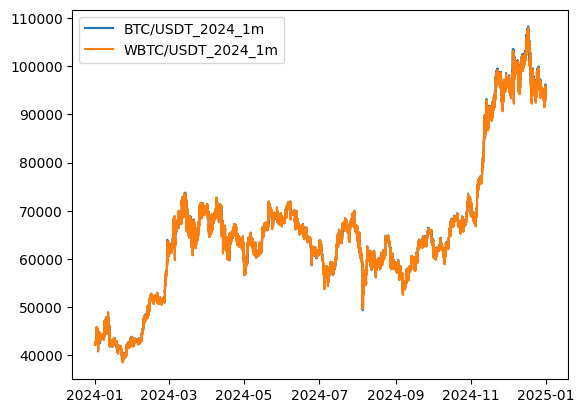

In [84]:
#Plot the closing prices of the merged data using different y axis

crypto_1 = prices.columns[0]
crypto_2 = prices.columns[1]

plt.plot(prices[crypto_1], label=crypto_1)
plt.plot(prices[crypto_2], label=crypto_2)
plt.legend(loc='upper left')
plt.show()






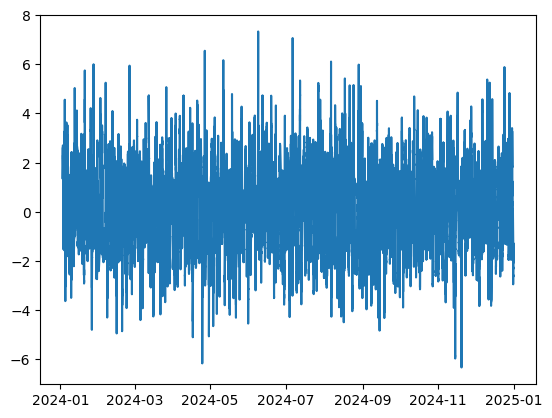

In [85]:
plt.plot(zscore_series)

In [124]:
initial_capital = 10_000.0
#tx_cost= 0.00031 #0.031% transaction cost
tx_cost= 0.00025 #0.025% transaction cost #Binance level 5 Maker Cost

trade_profits, cumulative_profit_series, entry_times, exit_times = simulate_strategy_trade_pnl(trade_entries, trade_exits, initial_capital, beta_series, tx_cost)

Trade Num: 0
-----------------------------------------------
Trade type: -1, Entry time: 2024-01-04 11:21:00, Exit time: 2024-01-04 12:11:00
Net Trade profit (includes fees): -1.3611827390383358
Abs of Entry Beta: 0.9845890748151018
Notional S1: 5038.826489020993, Notional S2: 4961.173510979007, Shares S1 : 0.11692515671436637, Shares S2: 0.11533184609767289
Percentage change S1: 0.27%, Percentage change S2: 0.35%
Trade Num: 1
-----------------------------------------------
Trade type: -1, Entry time: 2024-01-04 14:16:00, Exit time: 2024-01-04 16:53:00
Net Trade profit (includes fees): 13.524794625592136
Abs of Entry Beta: 0.9853672636200628
Notional S1: 5036.851459798064, Notional S2: 4963.148540201937, Shares S1 : 0.11605480058234326, Shares S2: 0.11454541372094215
Percentage change S1: 1.13%, Percentage change S2: 1.52%
Trade Num: 2
-----------------------------------------------
Trade type: 1, Entry time: 2024-01-05 01:48:00, Exit time: 2024-01-05 17:57:00
Net Trade profit (include

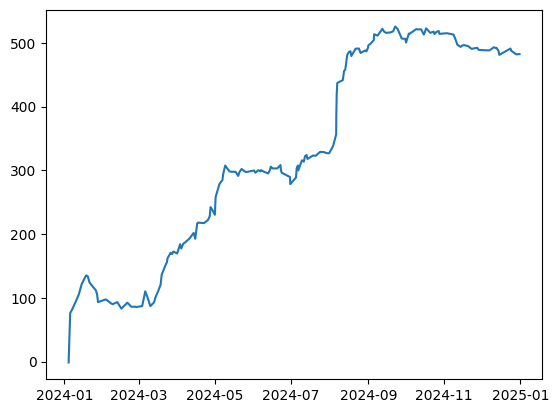

In [87]:
plt.plot(cumulative_profit_series)

(array([ 1.,  0.,  0.,  3.,  2.,  1.,  1.,  2.,  2.,  5.,  6.,  6.,  2.,
         6.,  5.,  4.,  7.,  8., 13.,  8.,  7.,  9.,  6.,  9.,  4.,  6.,
        10.,  1.,  3.,  3.,  2.,  4.,  2.,  3.,  2.,  0.,  5.,  3.,  1.,
         3.,  0.,  1.,  2.,  0.,  2.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-1.49909602e+01, -1.42011206e+01, -1.34112810e+01, -1.26214414e+01,
        -1.18316018e+01, -1.10417623e+01, -1.02519227e+01, -9.46208310e+00,
        -8.67224352e+00, -7.88240394e+00, -7.09256436e+00, -6.30272478e+00,
        -5.51288520e+00, -4.72304562e+00, -3.93320605e+00, -3.14336647e+00,
        -2.35352689e+00, -1.56368731e+00, -7.73847730e-01,  1.59918490e-02,
         8.05831428e-01,  1.59567101e+00,  2.38551059e

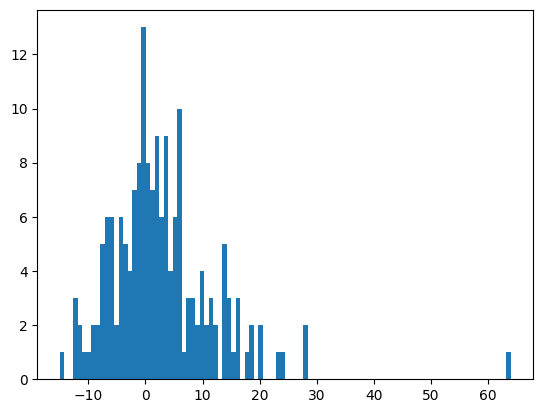

In [88]:
plt.hist(trade_profits, bins=100)

In [89]:
#Filter for negative values

trade_profits_neg = [x for x in trade_profits if x < 0]
print(f"Average trade loss:  € {np.mean(trade_profits_neg)}")

trade_profits_pos = [x for x in trade_profits if x > 0]
print(f"Average trade win:  € {np.mean(trade_profits_pos)}")

print("Number of negative profits(profits that were less than the transaction cost): ", len(trade_profits_neg))
print("Number of positive profits (profits that were greater than the transaction cost): ", len(trade_profits_pos))



Average trade loss:  € -4.5379838265259735
Average trade win:  € 8.100250275336547
Number of negative profits(profits that were less than the transaction cost):  74
Number of positive profits (profits that were greater than the transaction cost):  101


In [90]:
#Get index of greatest loss
max_loss_index = trade_profits.index(min(trade_profits))
max_loss_index

137

In [91]:
trade_entries[max_loss_index]

{'time': Timestamp('2024-09-27 10:03:00'),
 'S1': np.float64(65701.21),
 'S2': np.float64(65451.72),
 'z': np.float64(-3.0042617446717186),
 'position': 1}

In [92]:
trade_exits[max_loss_index]

{'time': Timestamp('2024-09-27 20:19:00'),
 'S1': np.float64(65719.91),
 'S2': np.float64(65595.97),
 'z': np.float64(0.00673225513824005),
 'exit_type': 'win'}

In [93]:
print(f"MAX LOSS: {trade_profits[max_loss_index]}")

MAX LOSS: -14.990960150553697


In [94]:
#Get trade entry and exit times
trade_entry_min_profit = entry_times[max_loss_index],
trade_exit_min_profit = exit_times[max_loss_index]

print(f"Trade entry time: {trade_entry_min_profit}")
print(f"Trade exit time: {trade_exit_min_profit}")

Trade entry time: (Timestamp('2024-09-27 10:03:00'),)
Trade exit time: 2024-09-27 20:19:00


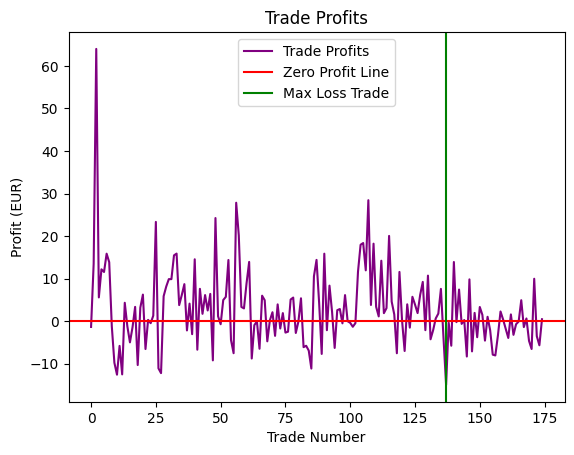

In [95]:
plt.plot(trade_profits, label='Trade Profits', color = 'purple')
plt.axhline(y=0, color='r', linestyle='-', label='Zero Profit Line')
plt.axvline(x=max_loss_index, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Trade Profits')
plt.xlabel('Trade Number')
plt.ylabel('Profit (EUR)')
plt.legend()

Average trade duration: 825.62 minutes


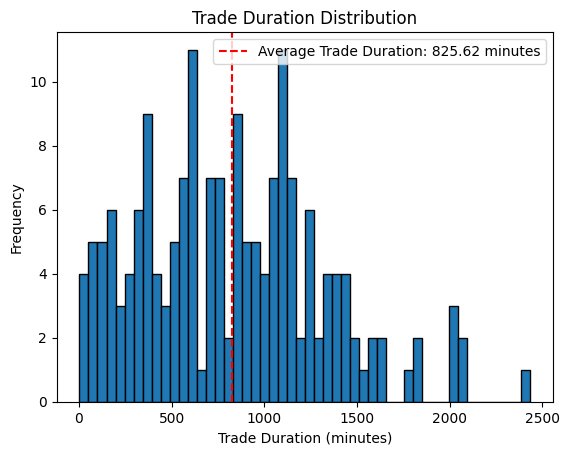

In [96]:
#Calculate the durations of all the trades
#trade_durations = [exit - entry for entry, exit in zip(entry_times, exit_times)]
trade_durations = [(exit_time - entry_time).total_seconds() / 60 for entry_time, exit_time in zip(entry_times, exit_times)]

average_trade_duration = np.mean(trade_durations)
print(f"Average trade duration: {average_trade_duration:.2f} minutes")
#Plot distribution of trade durations
plt.hist(trade_durations, bins=50, edgecolor='black')
plt.axvline(x=average_trade_duration, color='red', linestyle='--', label=f'Average Trade Duration: {average_trade_duration:.2f} minutes')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Trade Duration Distribution')
plt.legend()
plt.show()

In [97]:
trade_durations[1]

157.0

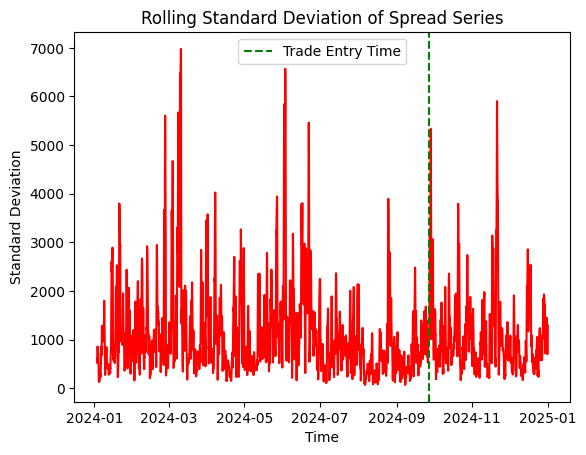

In [98]:
plt.plot(rolling_std, color = 'red')
plt.axvline(trade_entry_min_profit, color='green', linestyle='--', label='Trade Entry Time')
plt.xlabel('Time')
plt.ylabel('Standard Deviation')
plt.title('Rolling Standard Deviation of Spread Series')
plt.legend()


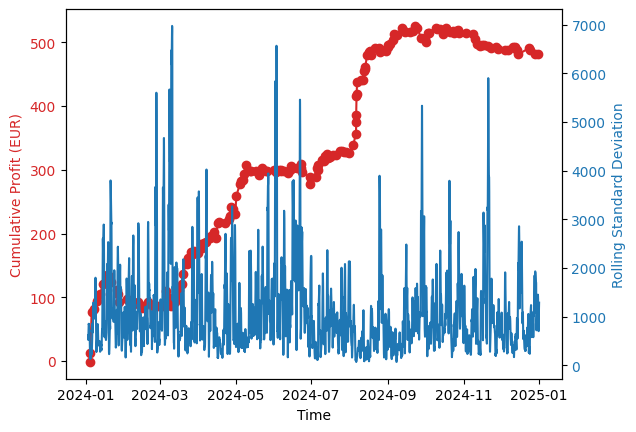

In [99]:
#Plot cumulative profit series and rolling standard deviation on same plot

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time')      
ax1.set_ylabel('Cumulative Profit (EUR)', color=color)
ax1.plot(cumulative_profit_series, color=color, marker='o')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Rolling Standard Deviation', color=color)
ax2.plot(rolling_std, color=color)
ax2.tick_params(axis='y', labelcolor=color) 


# Hypothesis: Big swings in returns are caused by over exposure to one side of the market due to entry using a "whipsawed Beta" + a big percentage price move over the trade
---

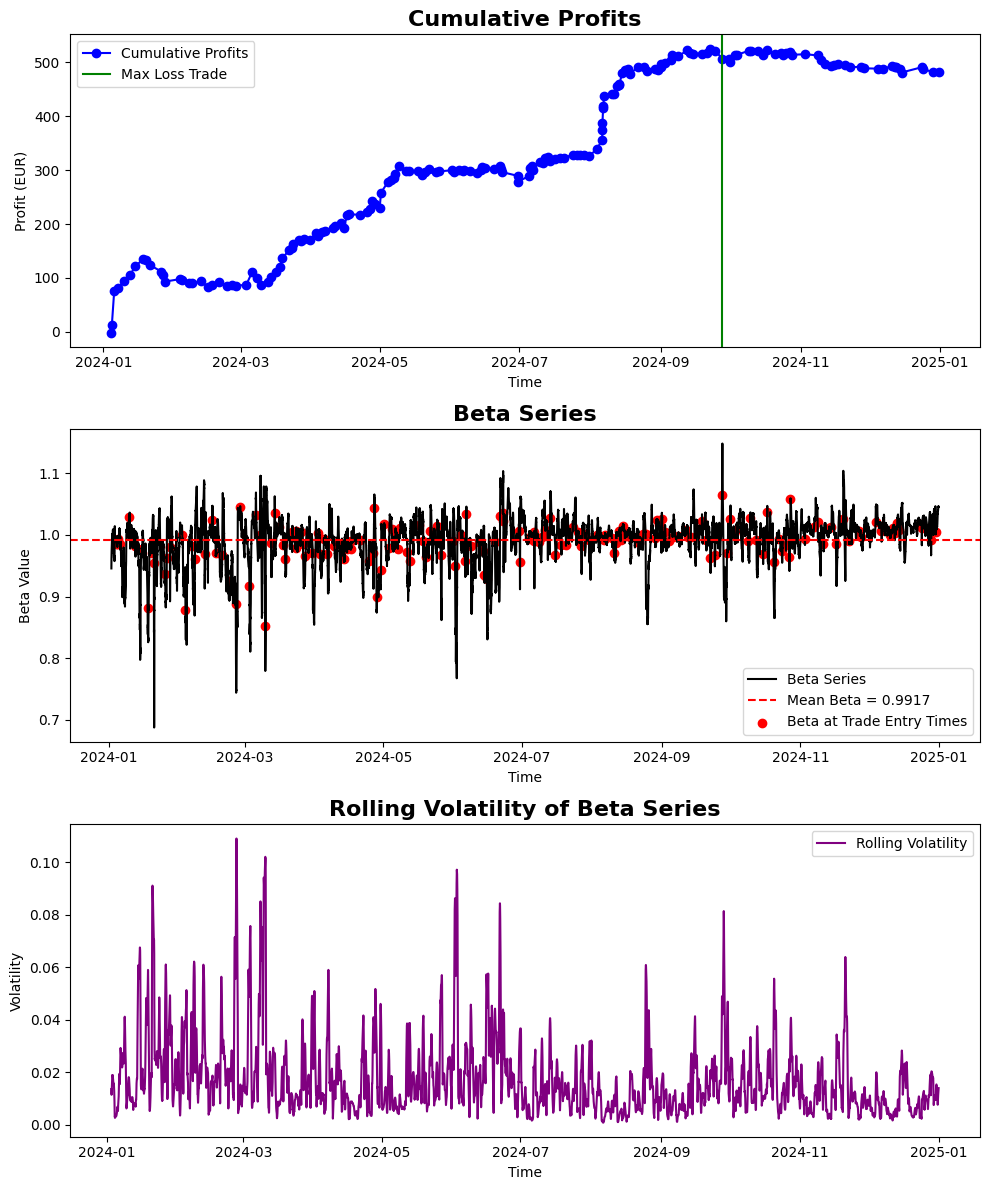

In [100]:
# Create a figure for stacked plots
plt.figure(figsize=(10, 12))

# First subplot: Cumulative Profits
plt.subplot(3, 1, 1)
plt.plot(cumulative_profit_series, label='Cumulative Profits', color='Blue', marker = 'o')
plt.axvline(x=trade_exit_min_profit, color='g', linestyle='-', label='Max Loss Trade')
plt.title('Cumulative Profits', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Profit (EUR)')
plt.legend()


# # First subplot: Trade Profits
# plt.subplot(4, 1, 2)
# plt.plot(trade_profits, label='Trade Profits', color='Green', marker='o')
# plt.title('Trade Profits', fontsize=16, fontweight='bold')
# plt.xlabel('Trade Number')
# plt.ylabel('Profit (EUR)')
# plt.legend()


# Second subplot: Beta Series with Mean Line
plt.subplot(3, 1, 2)
mean_beta = np.mean(beta_series)
plt.plot(beta_series, color='black', label='Beta Series')
plt.axhline(y=mean_beta, color='red', linestyle='--', label=f'Mean Beta = {mean_beta:.4f}')
plt.scatter(entry_times, [beta_series.loc[entry] for entry in entry_times], color='red', label='Beta at Trade Entry Times')
plt.title('Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Beta Value')
plt.legend()

# Third subplot: Rolling Volatility of Beta Series
# Adjust the layout to 4 rows and 1 column
plt.subplot(3, 1, 3)
rolling_volatility = beta_series.rolling(window_size).std()
plt.plot(rolling_volatility, color='purple', label='Rolling Volatility')
plt.title('Rolling Volatility of Beta Series', fontsize=16, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

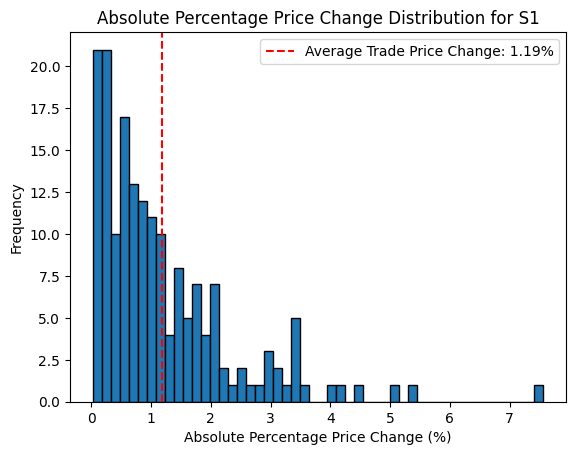

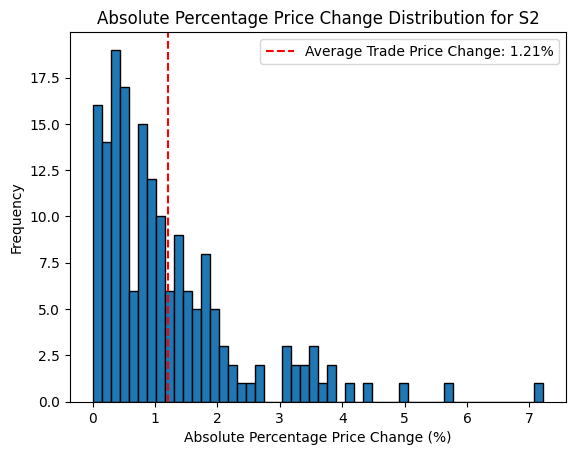

In [101]:

#Zip Beta at entries profits per trade and trade duration together 
beta_at_entries_profits = list(zip(beta_series.loc[entry_times], trade_profits, trade_durations))

#Calculate absolute percentage prrice change of S1 and S2 for each trade
abs_percentage_trade_price_change_S1 = [(abs(S1.loc[exit_time] - S1.loc[entry_time])/S1.loc[entry_time])*100  for entry_time, exit_time in zip(entry_times, exit_times)]
abs_percentage_trade_price_change_S2 = [(abs(S2.loc[exit_time] - S2.loc[entry_time])/S2.loc[entry_time])*100 for entry_time, exit_time in zip(entry_times, exit_times)]

#Distribution of absolute percentage price changes
plt.hist(abs_percentage_trade_price_change_S1, bins=50, edgecolor='black')
plt.axvline(x=np.mean(abs_percentage_trade_price_change_S1), color='red', linestyle='--', label=f'Average Trade Price Change: {np.mean(abs_percentage_trade_price_change_S1):.2f}%')
plt.xlabel('Absolute Percentage Price Change (%)')
plt.ylabel('Frequency')
plt.title('Absolute Percentage Price Change Distribution for S1')
plt.legend()
plt.show()

plt.hist(abs_percentage_trade_price_change_S2, bins=50, edgecolor='black')
plt.axvline(x=np.mean(abs_percentage_trade_price_change_S2), color='red', linestyle='--', label=f'Average Trade Price Change: {np.mean(abs_percentage_trade_price_change_S2):.2f}%')
plt.xlabel('Absolute Percentage Price Change (%)')
plt.ylabel('Frequency')
plt.title('Absolute Percentage Price Change Distribution for S2')
plt.legend()
plt.show()



In [102]:
#Check correlation between sign of trade profits and beta at entries
trade_profits_sign = [1 if profit > 0 else -1 for profit in trade_profits]

beta__entries_sign = [1 if beta > 0 else -1 for beta in beta_series.loc[entry_times]]


#Count the number of times where the the profit is negative for a negative beta and positive for a positive beta

count_neg_beta_neg_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == -1 and beta == -1)
count_pos_beta_pos_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == 1 and beta == 1)
count_neg_beta_pos_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == 1 and beta == -1)
count_pos_beta_neg_profit = sum(1 for profit, beta in zip(trade_profits_sign, beta__entries_sign) if profit == -1 and beta == 1)
print(f"Count of negative beta and negative profit: {count_neg_beta_neg_profit}")
print(f"Count of positive beta and positive profit: {count_pos_beta_pos_profit}")
print(f"Count of negative beta and positive profit: {count_neg_beta_pos_profit}")
print(f"Count of positive beta and negative profit: {count_pos_beta_neg_profit}")



Count of negative beta and negative profit: 0
Count of positive beta and positive profit: 101
Count of negative beta and positive profit: 0
Count of positive beta and negative profit: 74


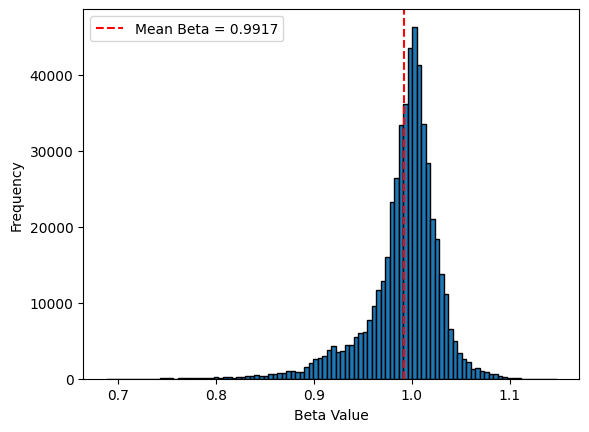

In [103]:
#Plot the distribution of beta series



plt.hist(beta_series, bins=100, edgecolor='black')
plt.axvline(x=np.mean(beta_series), color='red', linestyle='--', label=f'Mean Beta = {mean_beta:.4f}')
plt.xlabel('Beta Value')
plt.ylabel('Frequency')
plt.legend()

In [104]:
beta_series

timestamp
2024-01-01 00:00:00         NaN
2024-01-01 00:01:00         NaN
2024-01-01 00:02:00         NaN
2024-01-01 00:03:00         NaN
2024-01-01 00:04:00         NaN
                         ...   
2024-12-31 23:55:00    1.044819
2024-12-31 23:56:00    1.044831
2024-12-31 23:57:00    1.044870
2024-12-31 23:58:00    1.044859
2024-12-31 23:59:00    1.044871
Length: 526962, dtype: float64

# Relationship between returns volatility and Beta volatility
---

In [105]:
from scipy import stats


trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges
beta_series_trade_ranges = [beta_series[entry:exit] for entry, exit in trade_ranges]

#Calcullate the volatility of the beta series in the trade ranges
volatility_trade_ranges = [np.std(beta_series_trade_range) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate range of the beta series in the trade ranges
abs_beta_trade_ranges = [np.abs(np.max(beta_series_trade_range) - np.min(beta_series_trade_range)) for beta_series_trade_range in beta_series_trade_ranges]

#Calculate the absolute returns for each trade
absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#-------------------------------------------


# #Perform linear regression to determine if there is a relationship between absolute returns and volatility
# slope, intercept, r_value, p_value, std_err = stats.linregress(volatility_trade_ranges, absolute_trade_returns)
# print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R-squared: {r_value**2:.4f}, P-value: {p_value:.4f}, Standard Error: {std_err:.4f}")

# if p_value < 0.05:
#     print("There is a significant relationship between absolute returns and volatility")
# else:
#     print("There is no significant relationship between absolute returns and volatility")

# #Plot the relationship between absolute returns and volatility with a linear regression line
# plt.scatter(volatility_trade_ranges, absolute_trade_returns)
# plt.plot(volatility_trade_ranges, [slope*volatility_val + intercept for volatility_val in volatility_trade_ranges], color='red', label='Linear Regression')
# plt.xlabel('Beta Volatility')
# plt.ylabel('Absolute Returns')
# plt.title('Absolute Returns vs Volatility')
# plt.legend()
# plt.show()

#-------------------------------------------



Text(0.5, 1.0, 'Absolute Returns vs Beta Range')

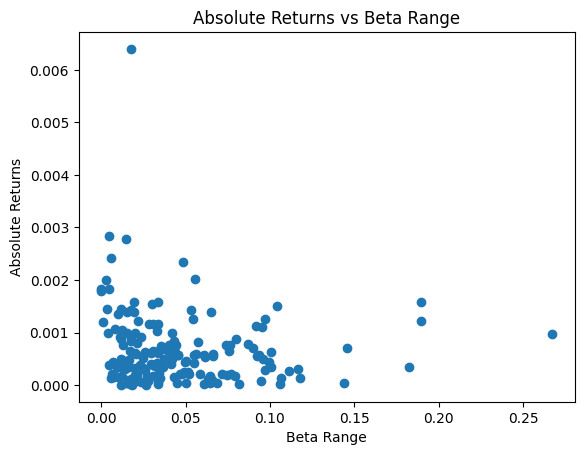

In [106]:
#Plot absolute_trade_returns vs abs_beta_trade_ranges
plt.scatter(abs_beta_trade_ranges, absolute_trade_returns)
plt.xlabel('Beta Range')
plt.ylabel('Absolute Returns')
plt.title('Absolute Returns vs Beta Range')

# Delta Neutrality 
---

Slope: -0.0044
Intercept: 0.0008
R-squared: 0.0202
P-value: 0.0608


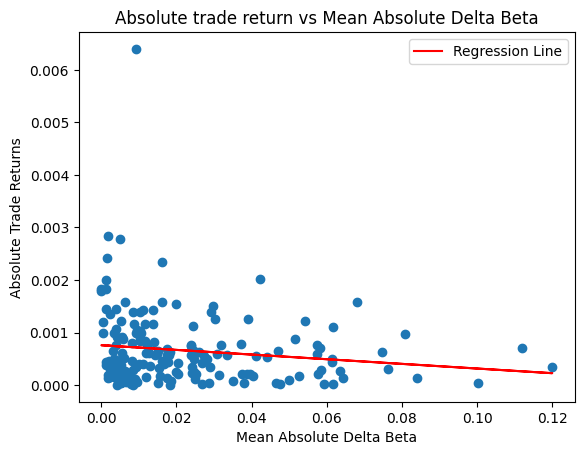

In [107]:
#Plot trade profits vs absolute delta neutrality

from scipy import stats

#Get actual Betas used for each trade entry
beta_entries = [beta_series[entry] for entry in entry_times]

trade_ranges = [(entry, exit) for entry, exit in zip(entry_times, exit_times)]

#Get beta series in the trade ranges

beta_series_trade_ranges = [beta_series[entry:exit].iloc[1:] for entry, exit in trade_ranges] #iloc[1:] to exclude the first beta value which is the same as the entry beta

#Calculate the absolute difference between the beta at the trade entry and the betas in the trade range
absolute_delta_betas = [np.abs(entry_beta - beta_range) for entry_beta, beta_range in zip(beta_entries, beta_series_trade_ranges)]

#Calculate the mean delta beta for each trade
mean_absolute_delta_betas = [np.mean(delta) for delta in absolute_delta_betas]


absolute_trade_returns = [np.abs(trade_profit/initial_capital) for trade_profit in trade_profits]

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(mean_absolute_delta_betas, absolute_trade_returns)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute delta neutrality and the regression line

plt.plot(mean_absolute_delta_betas, absolute_trade_returns, 'o',)
plt.plot(mean_absolute_delta_betas, intercept + slope*np.array(mean_absolute_delta_betas), 'r', label='Regression Line')
plt.xlabel('Mean Absolute Delta Beta')
plt.ylabel('Absolute Trade Returns')
plt.title('Absolute trade return vs Mean Absolute Delta Beta')
plt.legend()


Slope: -0.0022
Intercept: 0.0007
R-squared: 0.0043
P-value: 0.3906


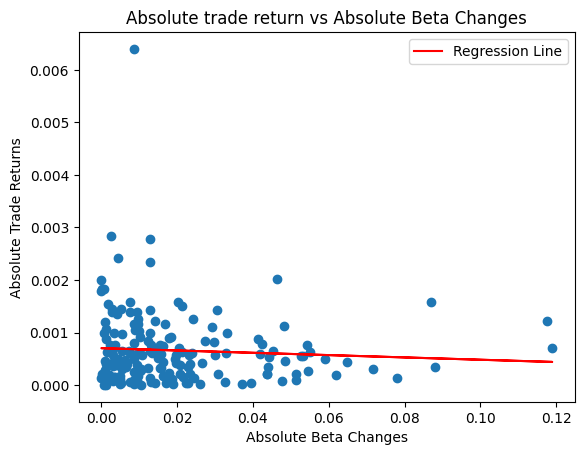

In [108]:
#Get entry beta for each trade
entry_betas = [beta_series[entry] for entry in entry_times]

#Get exit beta for each trade
exit_betas = [beta_series[exit] for exit in exit_times]

#Calculate the absolute difference between the entry and exit betas
absolute_beta_changes = [np.abs(exit - entry) for entry, exit in zip(entry_betas, exit_betas)]

#Regression analysis to determine if there is a relationship between beta changes and absolute trade returns

slope, intercept, r_value, p_value, std_err = stats.linregress(absolute_beta_changes, absolute_trade_returns)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

#Plot trade profits vs absolute beta changes and the regression line

plt.plot(absolute_beta_changes, absolute_trade_returns, 'o',)
plt.plot(absolute_beta_changes, intercept + slope*np.array(absolute_beta_changes), 'r', label='Regression Line')
plt.xlabel('Absolute Beta Changes')
plt.ylabel('Absolute Trade Returns')
plt.title('Absolute trade return vs Absolute Beta Changes')
plt.legend()

In [109]:
len(absolute_beta_changes)

175

In [110]:
#Get entry and exit betas for each trade
entry_betas = [beta_series[entry] for entry in entry_times]
exit_betas = [beta_series[exit] for exit in exit_times]

#Calculate the absolute difference between the entry and exit betas
absolute_beta_changes = [np.abs(exit - entry) for entry, exit in zip(entry_betas, exit_betas)]



In [111]:
# # Create a figure for stacked plots
# plt.figure(figsize=(10, 12))

# # First subplot: Cumulative Profits
# plt.subplot(3, 1, 1)
# plt.plot(absolute_trade_returns, color='Blue')
# plt.title('Absolute trade returns', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Absolute trade return')
# plt.legend()

# #Second subplot: Mean Absolute Delta Beta
# plt.subplot(3, 1, 2)
# plt.plot(mean_absolute_delta_betas, color='red')
# plt.title('Mean Absolute Delta Beta', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Mean Absolute Delta Beta')
# plt.legend()

# #Third subplot: Absolute Beta Changes
# plt.subplot(3, 1, 3)
# plt.plot(absolute_beta_changes, color='green')
# plt.title('Absolute Beta Changes', fontsize=16, fontweight='bold')
# plt.xlabel('Time')
# plt.ylabel('Absolute Beta Changes')
# plt.legend()



# # Adjust layout to prevent overlap
# plt.tight_layout()
# plt.show()

Slope: 0.0000
Intercept: 0.0060
R-squared: 0.1826
P-value: 0.0000
There is a significant relationship between trade durations and mean absolute delta beta


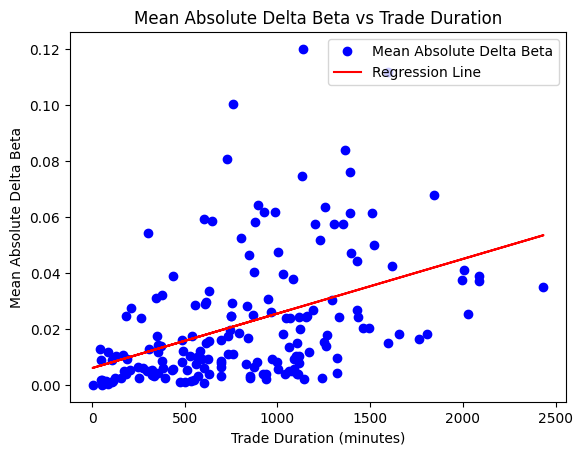

In [112]:
#Plot mean_absolute_delta_betas against trade durations with a regression line

#Perform a regression analysis to determine if there is a relationship between delta neutrality and trade profits
slope, intercept, r_value, p_value, std_err = stats.linregress(trade_durations, mean_absolute_delta_betas)

print(f"Slope: {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R-squared: {r_value**2:.4f}")
print(f"P-value: {p_value:.4f}")

if p_value < 0.05:
    print("There is a significant relationship between trade durations and mean absolute delta beta")
else:
    print("There is no significant relationship between trade durations and mean absolute delta beta")


#Plot trade profits vs absolute delta neutrality and the regression line
plt.plot(trade_durations, mean_absolute_delta_betas, 'o', label='Mean Absolute Delta Beta', color='blue')
plt.plot(trade_durations, intercept + slope*np.array(trade_durations), 'r', label='Regression Line')
plt.xlabel('Trade Duration (minutes)')
plt.ylabel('Mean Absolute Delta Beta')
plt.title('Mean Absolute Delta Beta vs Trade Duration')
plt.legend()
plt.show()


In [113]:
len(mean_absolute_delta_betas)

175

In [114]:
#Plot distributions of beta_series_trade_ranges in multiple subplots



In [115]:
len(beta_series_trade_ranges)

175

In [116]:
# #Calculate rolling standard deviation of S1 and S2
# rolling_std_S1 = S1.rolling(window=window_size).std()
# rolling_std_S2 = S2.rolling(window=window_size).std()

# #Plot the rolling standard deviation of S1 and S2 on separate plots

# plt.plot(rolling_std_S1, color='blue')
# plt.xlabel('Time')
# plt.ylabel('Standard Deviation')
# plt.title(f'Rolling Standard Deviation of {sym1}')




In [117]:
# plt.plot(rolling_std_S2, color='green')
# plt.xlabel('Time')
# plt.ylabel('Standard Deviation')
# plt.title(f'Rolling Standard Deviation of {sym2}')

In [118]:
#Get index of negative trade profits
negative_trade_profits_indeices = [i for i, x in enumerate(trade_profits) if x < 0]

#Get the corresponding trade entry and exit times
negative_trade_entry_times = [entry_times[i] for i in negative_trade_profits_indeices]
negative_trade_exit_times = [exit_times[i] for i in negative_trade_profits_indeices]


In [119]:
trade_exit_min_profit

Timestamp('2024-09-27 20:19:00')

Trade 1 : 2024-09-27 10:03:00 to 2024-09-27 20:19:00 (win)
Stop loss threshold is too high to be plotted


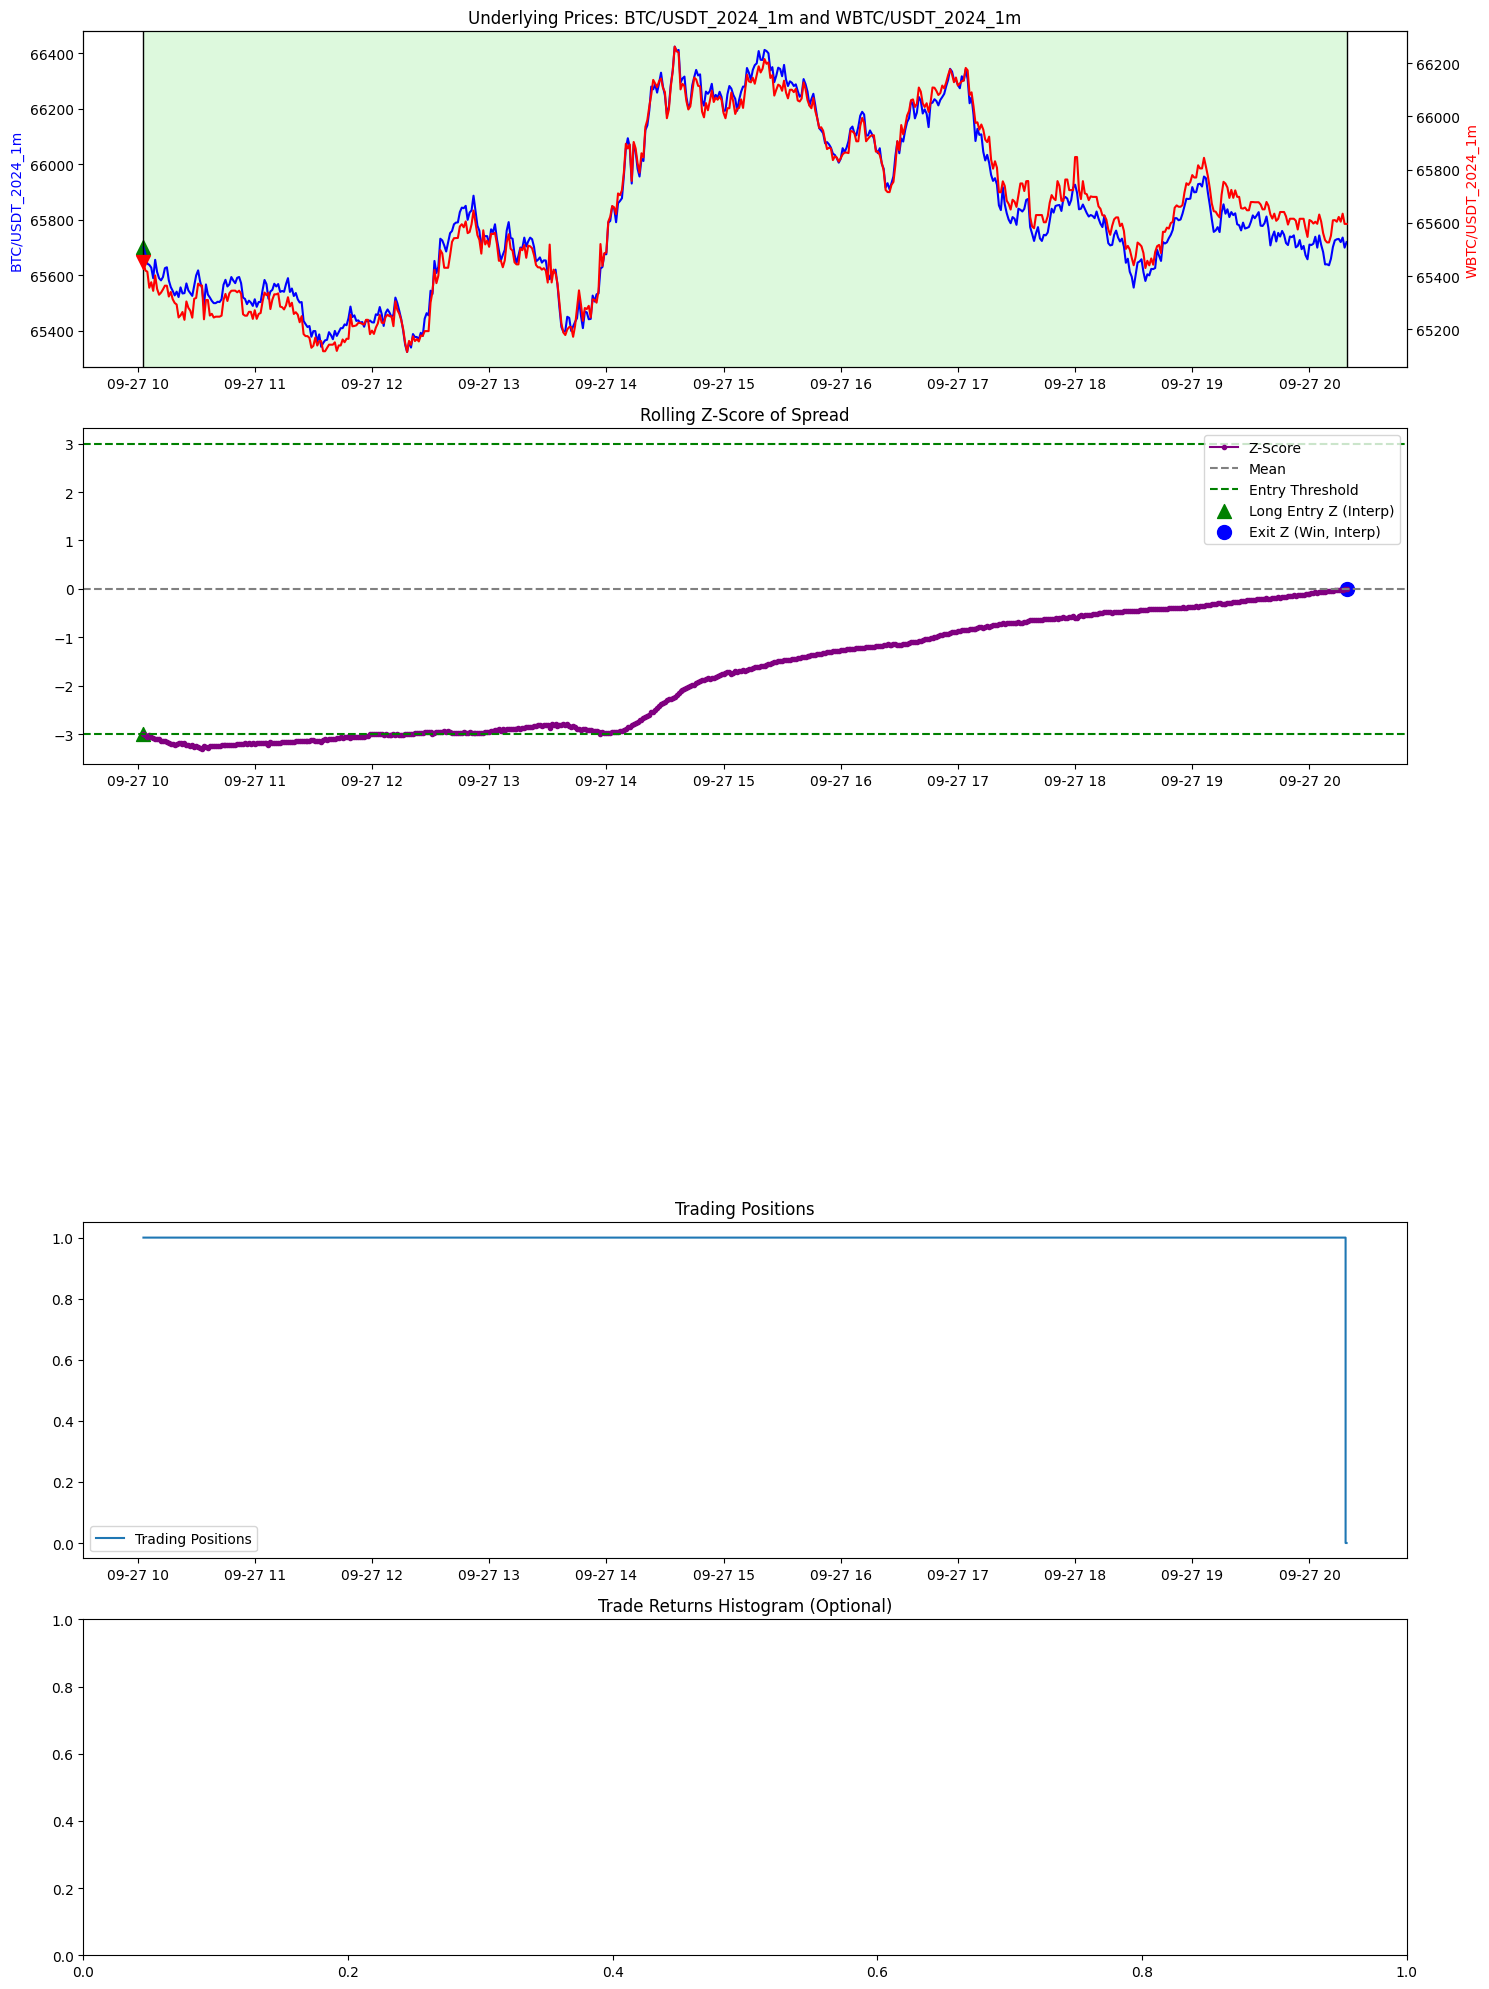

In [120]:
#Plot trading simulation

# window_start = pd.to_datetime('2024-03-01 00:00:00')
# window_end = pd.to_datetime('2024-03-25 00:00:00')

#Window for biggest loss
window_start = pd.to_datetime(trade_entry_min_profit[0])
window_end = pd.to_datetime(trade_exit_min_profit)

# window_start = pd.to_datetime('2024-06-17 16:00:00')
# window_end = pd.to_datetime('2024-06-17 16:50:00')


# window_start = None
# window_end = None

#NOTE THAT THE TIMES ON THE X AXIS SHOW THE HOURS AND MINUTES

# S1 = S1_mid_price
# S2 = S2_mid_price

plot_trading_simulation(
    S1, 
    S2, 
    sym1, 
    sym2, 
    zscore_series, 
    positions, 
    trade_profits,
    entry_threshold,
    stop_loss_threshold,
    trade_entries=trade_entries,  # list of dicts: { 'time', 'S1', 'S2', 'z', 'position' }
    trade_exits=trade_exits,    # list of dicts: { 'time', 'S1', 'S2', 'z', 'exit_type' }
    window_start=window_start,
    window_end=window_end
)



In [121]:
trade_exits

[{'time': Timestamp('2024-01-04 12:11:00'),
  'S1': np.float64(43211.85),
  'S2': np.float64(43167.14),
  'z': np.float64(-1.0258196979598897),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-04 16:53:00'),
  'S1': np.float64(43891.36),
  'S2': np.float64(43988.3),
  'z': np.float64(-0.016701133026687118),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-05 17:57:00'),
  'S1': np.float64(43617.07),
  'S2': np.float64(43491.7),
  'z': np.float64(0.028824590505120356),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-07 07:23:00'),
  'S1': np.float64(44035.14),
  'S2': np.float64(43980.63),
  'z': np.float64(-0.016787493654120404),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-10 03:06:00'),
  'S1': np.float64(46048.37),
  'S2': np.float64(45921.02),
  'z': np.float64(0.0708514605279277),
  'exit_type': 'win'},
 {'time': Timestamp('2024-01-12 16:34:00'),
  'S1': np.float64(43886.99),
  'S2': np.float64(43969.22),
  'z': np.float64(-0.06494740391258541),
  'exit_type': 'wi

In [122]:
#Check slippage

#Get timestampe of trade entries and exits
entry_times = [x['time'] for x in trade_entries]
exit_times = [x['time'] for x in trade_exits]

#Get the actual entry and exit prices of the two assets at the time of trade entries and exits
S1_actual_entry_prices = [x['S1'] for x in trade_entries]
S2_actual_entry_prices = [x['S2'] for x in trade_entries]

S1_actual_exit_prices = [x['S1'] for x in trade_exits]
S2_actual_exit_prices = [x['S2'] for x in trade_exits]

#Get the mid prices of the two assets at the time of trade entries and exits
S1_entry_mid_prices = S1_mid_price.loc[entry_times]
S2_entry_mid_prices = S2_mid_price.loc[entry_times]

S1_exit_mid_prices = S1_mid_price.loc[exit_times]
S2_exit_mid_prices = S2_mid_price.loc[exit_times]

#Get the slippage for the two assets
S1_entry_slippage_percentage = (S1_actual_entry_prices - S1_entry_mid_prices) / S1_entry_mid_prices * 100
S2_entry_slippage_percentage = (S2_actual_entry_prices - S2_entry_mid_prices) / S2_entry_mid_prices * 100

S1_exit_slippage_percentage = (S1_actual_exit_prices - S1_exit_mid_prices) / S1_exit_mid_prices * 100
S2_exit_slippage_percentage = (S2_actual_exit_prices - S2_exit_mid_prices) / S2_exit_mid_prices * 100


NameError: name 'S1_mid_price' is not defined

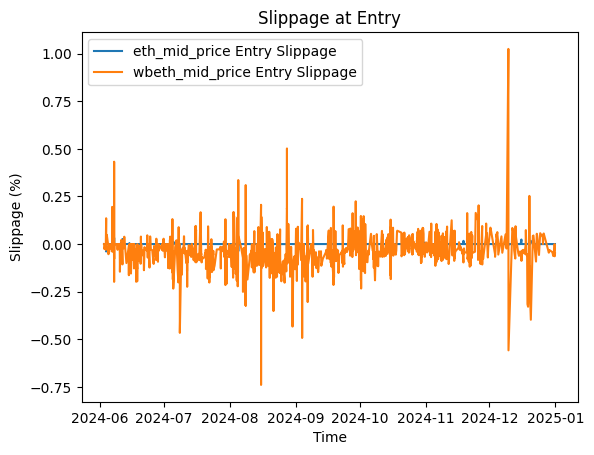

In [ ]:

#Create plots for slippage

plt.plot(S1_entry_slippage_percentage, label=f'{sym1} Entry Slippage')
plt.plot(S2_entry_slippage_percentage, label=f'{sym2} Entry Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Entry')
plt.legend(loc='upper left')
plt.show()


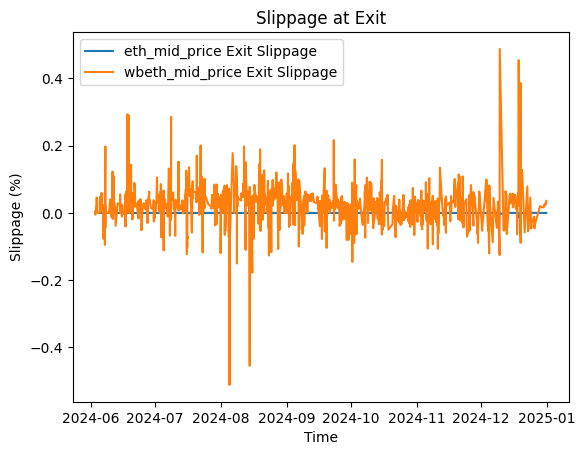

In [ ]:
plt.plot(S1_exit_slippage_percentage, label= f'{sym1} Exit Slippage')
plt.plot(S2_exit_slippage_percentage, label= f'{sym2} Exit Slippage')
plt.xlabel('Time')
plt.ylabel('Slippage (%)')
plt.title('Slippage at Exit')
plt.legend(loc='upper left')
plt.show()

In [42]:
#Print average S1 price change percent rounded to 2 decimal places

#Average Absolute Percentage Reversion
#---------------------------------------


In [43]:

def calculate_avg_abs_pct_reversion(trade_entries, trade_exits):
    """
    Calculate the average absolute percentage reversion from trade entry to trade exit
    for both asset price series (S1 and S2), using the interpolated trade data.
    
    Args:
        trade_entries (list): List of dictionaries for trade entries.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'position'
        trade_exits (list): List of dictionaries for trade exits.
            Each dict should have keys: 'time', 'S1', 'S2', 'z', 'exit_type'
    
    Returns:
        overall_avg (float): The average of the average absolute percentage changes for S1 and S2.
    """
    S1_pct_changes = []
    S2_pct_changes = []
    
    # Loop over paired trade entries and exits.
    for entry, exit in zip(trade_entries, trade_exits):
        entry_S1 = entry['S1']
        entry_S2 = entry['S2']
        exit_S1 = exit['S1']
        exit_S2 = exit['S2']
        
        # Calculate absolute percentage change for each asset.
        pct_change_S1 = np.abs((exit_S1 - entry_S1) / entry_S1 * 100)
        pct_change_S2 = np.abs((exit_S2 - entry_S2) / entry_S2 * 100)
        
        S1_pct_changes.append(pct_change_S1)
        S2_pct_changes.append(pct_change_S2)
    
    # Compute the average absolute percentage change for S1 and S2.
    avg_abs_S1 = np.mean(S1_pct_changes) if S1_pct_changes else 0
    avg_abs_S2 = np.mean(S2_pct_changes) if S2_pct_changes else 0
    
    # Overall average is the average of the two.
    overall_avg = (avg_abs_S1 + avg_abs_S2) / 2
    
    print(f"Average absolute S1 price change percent: {avg_abs_S1:.2f}%")
    print(f"Average absolute S2 price change percent: {avg_abs_S2:.2f}%")
    print(f"Average of average absolute price changes: {overall_avg:.2f}%")
    
    return overall_avg



In [44]:
overall_avg_reversion = calculate_avg_abs_pct_reversion(trade_entries, trade_exits)

Average absolute S1 price change percent: 0.21%
Average absolute S2 price change percent: 0.22%
Average of average absolute price changes: 0.21%
